# Matplotlib Homework - The Power of Plots

#### By raulfloresp

## Observations and Insights
#### Relevant observations from these challenge
#### - Duplicated mouse [g989] need to be excluded from the analysis to maintain consistency around the data. I decided to drop this record to enable consistency on the analysis. Number of mice to be analyzed moved to 248 mice.
#### - Standard Deviation and Standard Deviation Error of Mean (SEM), provide me an excellenr approach to identify the drug treamments with a greater efficiency.
#### - Bar plots were not quite useful to get relevant insights, however I can the insight of more extended drugs regimens: Capolumin, and Ramicane
#### - From the analysis of Pie representation, the sex factor is not so relevant. The difference between Male and Female are almost inexistent, and the trend goes to 50/50.
#### - From the Box Plot analysis, we can identify that the more effective treatments agains Tumor Volume are Capolumin and  Ramicane.
#### - The analysis of the Line plot for Capolumin demonstrates that the treatments around Tumor volume is efficient over the time points.
#### - The Correlation Coefficient of 0.84 between Weight and Average Tumor Volume shows a strong relation between weith and the effectiveness of treatment.

In [1]:
#%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [3]:
# Import Files

# Study data files
mouse_metadata_path = "Resources/Homework5_Mouse_metadata.csv"
study_results_path = "Resources/Homework5_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

## Study data files

### mouse_metadata

In [4]:
# Study data files - mouse_metadata
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
# Study data files - mouse_metadata
mouse_metadata.count()

Mouse ID        249
Drug Regimen    249
Sex             249
Age_months      249
Weight (g)      249
dtype: int64

### study_results

In [6]:
# Study data files - study_results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
# Study data files - study_results
study_results.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

### Create a merged data frame

In [8]:
# Combine the data into a single dataset
# outer join in python pandas
merge_df=pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the DataFrame.
unique_study_results = merge_df['Mouse ID'].value_counts()
number_of_mines = unique_study_results.count()
print(f"Number of mice: =" + str(number_of_mines))

Number of mice: =249


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_id = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
print(duplicated_mouse_id)

['g989']


In [11]:
# Optional: Get all the data for the duplicate mouse ID.
# A general counting of Mouse ID records
merge_df["Mouse ID"].value_counts()

g989    13
e662    10
e213    10
o331    10
l471    10
        ..
n482     1
h428     1
x336     1
l872     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
#locate the g989 rows in the drug data
g989_data = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# remove the duplicated data from both datasets, and early merge data frame 
# using a != operator to extract all data bu g989
clean_mouse_metadata = mouse_metadata.loc[mouse_metadata["Mouse ID"] != "g989", :]
clean_study_results = study_results.loc[study_results["Mouse ID"] != "g989", :]
clean_merge_df = merge_df.loc[merge_df["Mouse ID"] != "g989", :]

clean_merge_df["Mouse ID"].value_counts()
# we can see on results that now the Data Frame has 248 lenght and duplicated
# _values were removed

e662    10
z969    10
o331    10
l471    10
a401    10
        ..
u153     1
x226     1
f932     1
h428     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

In [14]:
# Checking the number of mice in the clean DataFrame.
clean_results = clean_merge_df['Mouse ID'].value_counts()
number_of_mines_clean = clean_results.count()
print(f"Number of mice: =" + str(number_of_mines_clean))

Number of mice: =248


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation,_
# _and SEM of the tumor volume for each regimen

# Mean
tumor_mean = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Median
tumor_median = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Variance
tumor_variance = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Standard deviation
tumor_std_deviation = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# SEM
tumor_SEM = clean_merge_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#Build Summary Table
summary_table = pd.DataFrame({"Mean": tumor_mean, "Median": tumor_median, "Variance": tumor_variance, "Standard Deviation": 
                              tumor_std_deviation, "SEM": tumor_SEM})
summary_table


# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#use aggregation of columns
summary_consolidated = clean_merge_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)" :["mean", "median", "var", "std", "sem"]})
summary_consolidated.head()

# This method produces everything in a single groupby function.
# https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar Plots

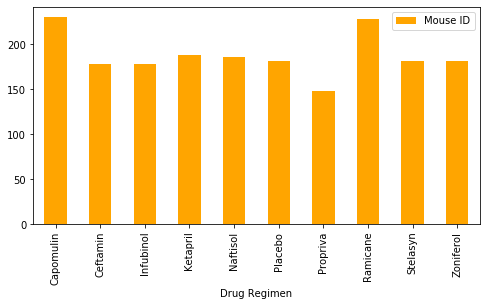

<Figure size 432x288 with 0 Axes>

In [17]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mice_per_time = pd.DataFrame(clean_merge_df.groupby(["Drug Regimen"]).count()).reset_index()

#mice_per_time point
mice_pertime_points = mice_per_time[["Drug Regimen","Mouse ID"]]
# regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})

regimen_drug_points = mice_pertime_points.set_index("Drug Regimen")

#Dataframe Pandas Plot
regimen_drug_points.plot(kind="bar", color = "orange", figsize=(8,4))
plt.show()
plt.tight_layout()

In [18]:
plt.clf()
plt.cla()
plt.close()

In [19]:
drug_regimens = summary_table.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

<BarContainer object of 10 artists>

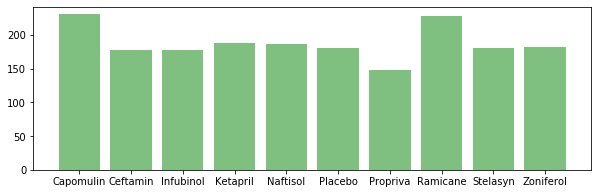

In [20]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# select column to convert to list here
regimen_drug = (clean_merge_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
x_axis = drug_regimens
plt.figure(figsize=(10,3))
plt.bar(x_axis, regimen_drug, color='green', alpha=0.5, align="center")

In [21]:
plt.clf()
plt.cla()
plt.close()

## Pie Plots

In [22]:
clean_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(clean_merge_df.groupby(["Sex"]).count()).reset_index()

# Drop non useful columns in the data frame 
drop_columns = ["Drug Regimen", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]
drop_mice_gender_df = mice_gender_df.drop(drop_columns, axis=1)
drop_mice_gender_df

,Sex,Mouse ID
0,Female,922
1,Male,958


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A10B4922B0>],
      dtype=object)

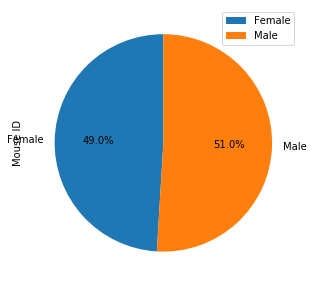

In [24]:
drop_mice_gender_df.groupby(['Sex']).sum().plot(kind='pie', subplots=True, shadow = False,startangle=90,
figsize=(6,5), autopct='%1.1f%%')

# plot chart
#plt.figure(figsize=(10,4))
#ax1 = plt.subplot(121, aspect='equal')
#mice_gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
# startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [25]:
plt.clf()
plt.cla()
plt.close()

([<matplotlib.patches.Wedge at 0x2a10b5731c0>,
 [Text(-1.1994571897995099, 0.036089469908308275, 'Females'),
  Text(1.0995024239828841, -0.03308201408261557, 'Males')],
 [Text(-0.6996833607163806, 0.02105219077984649, '49.0%'),
  Text(0.5997285948997549, -0.018044734954153943, '51.0%')])

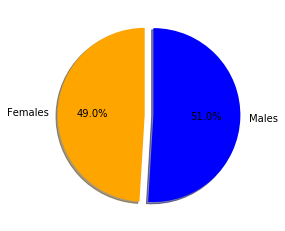

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Convert Columns into lists
gender_count = (clean_merge_df.groupby(["Sex"])["Age_months"].count()).tolist()
#drop_mice_gender_df

pie_labels = ["Females", "Males"]
pie_colors = ["orange", "blue"]
explode = (0.1, 0)
plt.pie(gender_count, explode=explode, labels=pie_labels, colors=pie_colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

In [27]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

#### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

#### Final tumor volume of each mouse across four of the most promising treatment regimens.

In [28]:
#Idenify four of the most promising treatments by the lower SEM value
top_treatments_SEM = summary_table.sort_values(by="SEM", ascending=True)
top_treatments_SEM

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [29]:
#Create a list of top four treatments
four_treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
four_treatments
print("Top treatments are: ", four_treatments)

Top treatments are:  ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [30]:
#Extract the top 4 regimenes from the data frame in order to perform IQR test on each
top_four_treatments = clean_merge_df[clean_merge_df["Drug Regimen"].isin(["Ramicane", "Capomulin", "Ceftamin", "Infubinol"])]
top_four_treatments = top_four_treatments.sort_values(["Timepoint"], ascending=True)

top_four_treatments_df = top_four_treatments[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_four_treatments_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [31]:
#Now we group data by Drug Regimen and Mouse ID to summarize Tumor Measurements
top_treatments_summary = top_four_treatments_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
#top_treatments_summary

# Create a DataFrame of Top Treatments
top_treatments_df = top_treatments_summary.to_frame()
top_treatments_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

#### Calculate the IQR and quantitatively determine if there are any potential outliers.

In [32]:
#Data treatment 1 - Ramicane
ramicane_df = clean_merge_df[clean_merge_df['Drug Regimen'].isin(['Ramicane'])]
ramicane_df.head().reset_index()
# Convert column "Tumor Volume" of the ramicane regimen into a dataframe object
ramicane_list = ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramicane_list = ramicane_list["Tumor Volume (mm3)"]
#ramicane_list

In [33]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_ramicane = ramicane_list.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

print(f"The interquartile range of Tumor Volume for Ramicane is: {iqr_ramicane}")

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
print(f"Values below {lower_bound_ramicane} could be outliers for Ramicane.")
print(f"Values above {upper_bound_ramicane} could be outliers for Ramicane.")

The interquartile range of Tumor Volume for Ramicane is: 8.325365415000007
Values below 24.18658646249998 could be outliers for Ramicane.
Values above 57.48804812250001 could be outliers for Ramicane.


In [34]:
#Prepare data treatment 2 - Capomulin
capomulin_df = clean_merge_df[clean_merge_df['Drug Regimen'].isin(['Capomulin'])]
capomulin_df.head().reset_index()
# Convert column "Tumor Volume" of the Capomulin regimen into a dataframe object
capomulin_list = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capomulin_list = capomulin_list["Tumor Volume (mm3)"]
#capomulin_list

In [35]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_capomulin = capomulin_list.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

print(f"The interquartile range of Tumor Volume for Capomulin is: {iqr_capomulin}")

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
print(f"Values below {lower_bound_capomulin} could be outliers for Capomulin.")
print(f"Values above {upper_bound_capomulin} could be outliers for Capomulin.")

The interquartile range of Tumor Volume for Capomulin is: 7.314067135000002
Values below 26.714832162499995 could be outliers for Capomulin.
Values above 55.9711007025 could be outliers for Capomulin.


In [36]:
#Prepare data treatment 3 - Ceftamin
ceftamin_df = clean_merge_df[clean_merge_df['Drug Regimen'].isin(['Ceftamin'])]
ceftamin_df.head().reset_index()
# Convert column "Tumor Volume" of the ceftamin regimen into a dataframe object
ceftamin_list = ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ceftamin_list = ceftamin_list["Tumor Volume (mm3)"]
#ceftamin_list

In [37]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_ceftamin = ceftamin_list.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

print(f"The interquartile range of Tumor Volume for ceftamin is: {iqr_ceftamin}")

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
print(f"Values below {lower_bound_ceftamin} could be outliers for Ceftamin.")
print(f"Values above {upper_bound_ceftamin} could be outliers for Ceftamin.")

The interquartile range of Tumor Volume for ceftamin is: 9.5930104575
Values below 32.818911426250004 could be outliers for Ceftamin.
Values above 71.19095325625 could be outliers for Ceftamin.


In [38]:
#Prepare data treatment 4 - Infubinol
infubinol_df = clean_merge_df[clean_merge_df['Drug Regimen'].isin(['Infubinol'])]
infubinol_df.head().reset_index()
# Convert column "Tumor Volume" of the infubinol regimen into a dataframe object
infubinol_list = infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infubinol_list = infubinol_list["Tumor Volume (mm3)"]
#infubinol_list

In [39]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles_infubinol = infubinol_list.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

print(f"The interquartile range of Tumor Volume for Infubinol is: {iqr_infubinol}")

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
print(f"Values below {lower_bound_infubinol} could be outliers for Infubinol.")
print(f"Values above {upper_bound_infubinol} could be outliers for Infubinol.")

The interquartile range of Tumor Volume for Infubinol is: 10.002090667500006
Values below 32.309217298749985 could be outliers for Infubinol.
Values above 72.31757996875001 could be outliers for Infubinol.


#### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

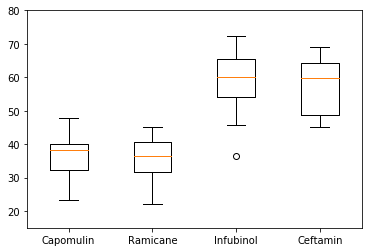

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumorvolume_df = top_treatments_df.reset_index()
treatments_lists = final_tumorvolume_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
treatment_list_df = pd.DataFrame(treatments_lists)
treatment_list_df = treatment_list_df.reindex(four_treatments)
treatment_vols = [vol for vol in treatment_list_df['Tumor Volume (mm3)']]
plt.boxplot(treatment_vols, labels=four_treatments)
plt.ylim(15, 80)
plt.show()

In [41]:
plt.clf()
plt.cla()
plt.close()

## Line and Scatter Plots

### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

##### Create a sub-data-frame for Capomulin Treatment anf filter results for a specific mouse

In [42]:
# Create the data frame for Capomulin
#clean_merge_df
capomulin_df = clean_merge_df.loc[clean_merge_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head(20)

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


In [43]:
# Mouse selected on the Capomulin Data Framework is x401
capomulin_x401_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "x401"]
#capomulin_mouse_df

In [44]:
#Reduce data frame to variables to be analized
capomulin_x401_df_volume = capomulin_x401_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
capomulin_x401_df_volume = capomulin_x401_df_volume.reset_index(drop=True)
capomulin_x401_df_volume

,Timepoint,Tumor Volume (mm3)
0,0,45.000000
1,5,45.473753
2,10,39.113891
3,15,39.776250
4,20,36.065835
5,25,36.617120
6,30,32.915292
7,35,30.206825
8,40,28.167397
9,45,28.484033


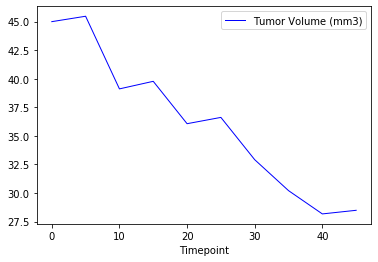

In [45]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_x401_df_volume.set_index('Timepoint').plot(figsize=(6, 4), linewidth=1.0, color='blue')
plt.show()

In [46]:
plt.clf()
plt.cla()
plt.close()

In [47]:
# Create the data frame for analysis of weight and volume for Capomulin
volume_weight_cap_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

#Get average Tumor Volume
average_volume_capomuline = pd.DataFrame(volume_weight_cap_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_volume_capomuline.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [48]:
# Rename columns before plotting and set index
average_volume_capomuline = average_volume_capomuline.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_volume_capomuline = average_volume_capomuline.set_index('Mouse ID')
average_volume_capomuline.head()

,Weight (g),Average Volume
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


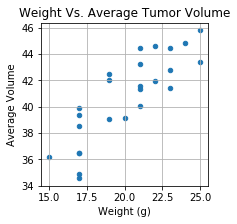

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_volume_capomuline.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(3,3),
              title="Weight Vs. Average Tumor Volume")
plt.show()

In [50]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

### Calculate the correlation coefficient and linear regression model

In [51]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

#Get mouse weight and average tumor volume from Capomulim data frame
mouse_weight_df = average_volume_capomuline.iloc[:,0]
average_tumor_volume_df = average_volume_capomuline.iloc[:,1]

# Calculate the pearsonr correlation between the two variables: Weight and Volume
correlation_coefficient = st.pearsonr(mouse_weight_df, average_tumor_volume_df)

print(f"Correlation Coefficient = ", round(correlation_coefficient[0],2))

Correlation Coefficient =  0.84


### Plot the correlation plus regression

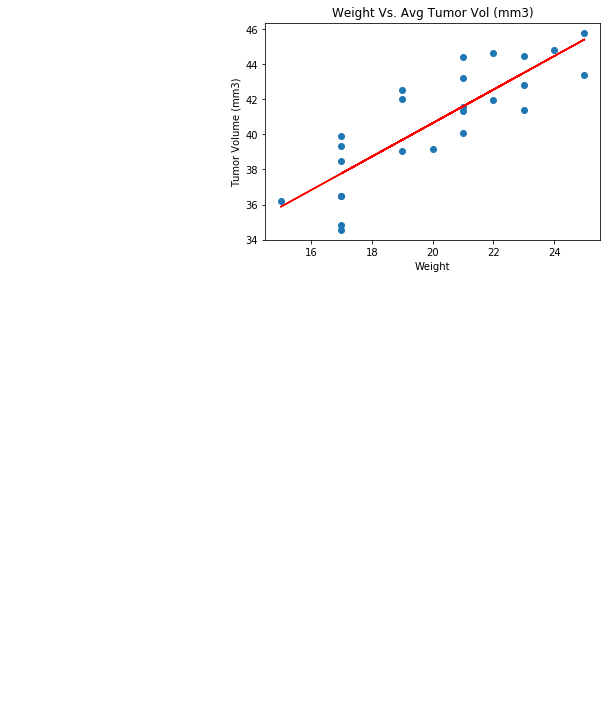

In [57]:
#Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_volume_capomuline["Weight (g)"]
y_values = average_volume_capomuline["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,8),fontsize=10, color="blue")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight Vs. Avg Tumor Vol (mm3)")
plt.show()

In [53]:
plt.clf()
plt.cla()
plt.close()

## End of challenge